Timestamp: 1719994565.4882402, Latitude: 35.6738, Longitude: -25.2576
Timestamp: 1719994578.935113, Latitude: 35.1073, Longitude: -24.4981
Timestamp: 1719994591.4020019, Latitude: 34.5779, Longitude: -23.805
Timestamp: 1719994601.861821, Latitude: 34.1299, Longitude: -23.2302
Timestamp: 1719994614.288712, Latitude: 33.614, Longitude: -22.5813
Timestamp: 1719994624.866129, Latitude: 33.1594, Longitude: -22.0204
Timestamp: 1719994637.357237, Latitude: 32.6145, Longitude: -21.3608
Timestamp: 1719994651.7704692, Latitude: 31.9775, Longitude: -20.6066
Timestamp: 1719994662.302839, Latitude: 31.513, Longitude: -20.0674
Timestamp: 1719994673.818988, Latitude: 31.0012, Longitude: -19.4836
Timestamp: 1719994688.3156638, Latitude: 30.3516, Longitude: -18.7572
Timestamp: 1719994698.915006, Latitude: 29.8783, Longitude: -18.2377
Timestamp: 1719994714.353958, Latitude: 29.1755, Longitude: -17.4807
Timestamp: 1719994727.8831098, Latitude: 28.5592, Longitude: -16.8305
Timestamp: 1719994738.3025012, L

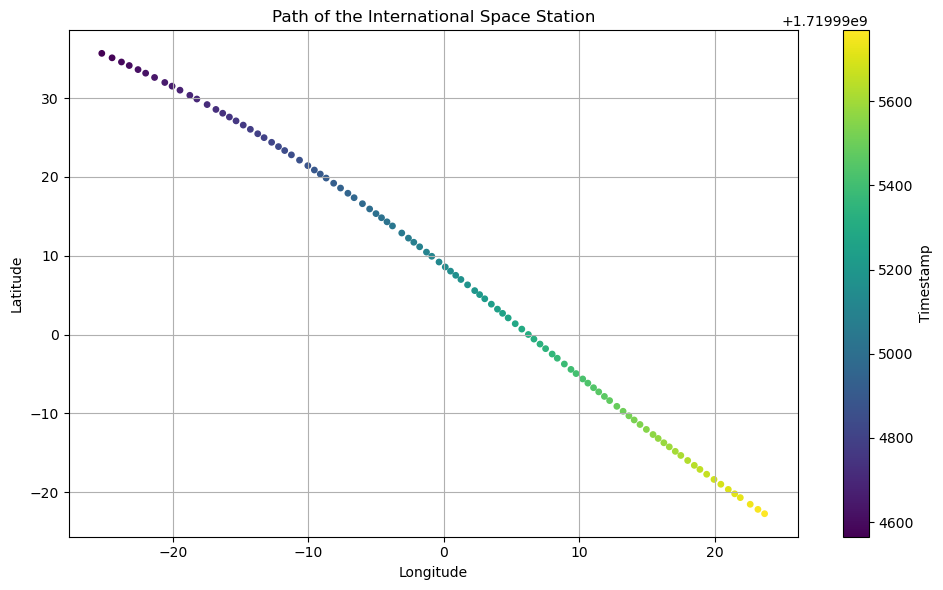

In [1]:
import requests
import time
import matplotlib.pyplot as plt

# API endpoint URL
url = 'http://api.open-notify.org/iss-now.json'

# Number of data points needed to fetch
num_points = 100

# Time interval between requests (in seconds)
interval = 10

# Lists to store data points
timestamps = []
latitudes = []
longitudes = []

try:
    for _ in range(num_points):
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            timestamp = time.time()
            latitude = float(data['iss_position']['latitude'])
            longitude = float(data['iss_position']['longitude'])
            timestamps.append(timestamp)
            latitudes.append(latitude)
            longitudes.append(longitude)
            print(f"Timestamp: {timestamp}, Latitude: {latitude}, Longitude: {longitude}")
        else:
            print(f"Error fetching data: {response.status_code}")
        
        time.sleep(interval)

except KeyboardInterrupt:
    print("Data fetching interrupted by user.")

print(f"Total data points fetched: {len(timestamps)}")

# Plotting the path of the ISS
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=timestamps, cmap='viridis', marker='o', s=15)
plt.colorbar(label='Timestamp')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Path of the International Space Station')
plt.grid(True)
plt.tight_layout()
plt.show()
